In [8]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

Using TensorFlow backend.


In [9]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!") 

Done!


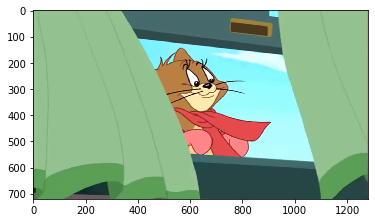

In [10]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)

In [11]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()      # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [12]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [13]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [14]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image) 

In [15]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf') 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [17]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [18]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [19]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid) 
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [20]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512) 

In [21]:
X_train.shape, X_valid.shape

((208, 25088), (90, 25088))

In [22]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max() 

In [23]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [24]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [25]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid)) 

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - ETA: 5s - loss: 1.1999 - accuracy: 0.25 - ETA: 3s - loss: 1.3554 - accuracy: 0.32 - ETA: 2s - loss: 1.3207 - accuracy: 0.36 - ETA: 1s - loss: 1.2251 - accuracy: 0.42 - ETA: 0s - loss: 1.1408 - accuracy: 0.45 - ETA: 0s - loss: 1.0522 - accuracy: 0.48 - 4s 17ms/step - loss: 1.0466 - accuracy: 0.4856 - val_loss: 0.6464 - val_accuracy: 0.6444
Epoch 2/100
208/208 [==============================] - ETA: 2s - loss: 0.4958 - accuracy: 0.87 - ETA: 1s - loss: 0.4684 - accuracy: 0.84 - ETA: 1s - loss: 0.4133 - accuracy: 0.86 - ETA: 1s - loss: 0.3908 - accuracy: 0.86 - ETA: 0s - loss: 0.3815 - accuracy: 0.86 - ETA: 0s - loss: 0.3463 - accuracy: 0.88 - 3s 14ms/step - loss: 0.3404 - accuracy: 0.8750 - val_loss: 0.4830 - val_accuracy: 0.7889
Epoch 3/100
208/208 [==============================] - ETA: 2s - loss: 0.1647 - accuracy: 0.96 - ETA: 1s - loss: 0.1757 - accuracy: 0.96 - ETA: 1s - loss: 0.1592 -

208/208 [==============================] - ETA: 2s - loss: 0.0074 - accuracy: 1.00 - ETA: 2s - loss: 0.0147 - accuracy: 1.00 - ETA: 1s - loss: 0.0118 - accuracy: 1.00 - ETA: 1s - loss: 0.0100 - accuracy: 1.00 - ETA: 0s - loss: 0.0090 - accuracy: 1.00 - ETA: 0s - loss: 0.0180 - accuracy: 0.99 - 3s 14ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.3528 - val_accuracy: 0.8667
Epoch 22/100
208/208 [==============================] - ETA: 2s - loss: 0.0050 - accuracy: 1.00 - ETA: 1s - loss: 0.0157 - accuracy: 1.00 - ETA: 1s - loss: 0.0124 - accuracy: 1.00 - ETA: 0s - loss: 0.0109 - accuracy: 1.00 - ETA: 0s - loss: 0.0140 - accuracy: 0.99 - ETA: 0s - loss: 0.0123 - accuracy: 0.99 - 3s 15ms/step - loss: 0.0119 - accuracy: 0.9952 - val_loss: 0.3061 - val_accuracy: 0.8778
Epoch 23/100
208/208 [==============================] - ETA: 2s - loss: 0.0077 - accuracy: 1.00 - ETA: 2s - loss: 0.0113 - accuracy: 1.00 - ETA: 1s - loss: 0.0088 - accuracy: 1.00 - ETA: 1s - loss: 0.0265 - accuracy: 0.

208/208 [==============================] - ETA: 2s - loss: 0.0019 - accuracy: 1.00 - ETA: 2s - loss: 0.0024 - accuracy: 1.00 - ETA: 1s - loss: 0.0031 - accuracy: 1.00 - ETA: 1s - loss: 0.0031 - accuracy: 1.00 - ETA: 0s - loss: 0.0031 - accuracy: 1.00 - ETA: 0s - loss: 0.0029 - accuracy: 1.00 - 3s 17ms/step - loss: 0.0196 - accuracy: 0.9952 - val_loss: 0.3710 - val_accuracy: 0.8778
Epoch 42/100
208/208 [==============================] - ETA: 2s - loss: 0.0076 - accuracy: 1.00 - ETA: 2s - loss: 0.0049 - accuracy: 1.00 - ETA: 1s - loss: 0.0036 - accuracy: 1.00 - ETA: 1s - loss: 0.0047 - accuracy: 1.00 - ETA: 0s - loss: 0.0047 - accuracy: 1.00 - ETA: 0s - loss: 0.0064 - accuracy: 1.00 - 3s 16ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.3526 - val_accuracy: 0.8667
Epoch 43/100
208/208 [==============================] - ETA: 2s - loss: 0.0060 - accuracy: 1.00 - ETA: 2s - loss: 0.0065 - accuracy: 1.00 - ETA: 1s - loss: 0.0065 - accuracy: 1.00 - ETA: 1s - loss: 0.0060 - accuracy: 1.

208/208 [==============================] - ETA: 2s - loss: 0.0022 - accuracy: 1.00 - ETA: 2s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0487 - accuracy: 0.98 - ETA: 1s - loss: 0.0367 - accuracy: 0.99 - ETA: 0s - loss: 0.0296 - accuracy: 0.99 - ETA: 0s - loss: 0.0248 - accuracy: 0.99 - 3s 16ms/step - loss: 0.0245 - accuracy: 0.9952 - val_loss: 0.3530 - val_accuracy: 0.8667
Epoch 62/100
208/208 [==============================] - ETA: 2s - loss: 0.0387 - accuracy: 0.96 - ETA: 2s - loss: 0.0200 - accuracy: 0.98 - ETA: 1s - loss: 0.0136 - accuracy: 0.98 - ETA: 1s - loss: 0.0106 - accuracy: 0.99 - ETA: 0s - loss: 0.0092 - accuracy: 0.99 - ETA: 0s - loss: 0.0210 - accuracy: 0.98 - 3s 16ms/step - loss: 0.0195 - accuracy: 0.9904 - val_loss: 0.3196 - val_accuracy: 0.8778
Epoch 63/100
208/208 [==============================] - ETA: 2s - loss: 0.0550 - accuracy: 0.96 - ETA: 1s - loss: 0.0280 - accuracy: 0.98 - ETA: 1s - loss: 0.0190 - accuracy: 0.98 - ETA: 1s - loss: 0.0145 - accuracy: 0.

208/208 [==============================] - ETA: 2s - loss: 6.4020e-04 - accuracy: 1.00 - ETA: 2s - loss: 7.0944e-04 - accuracy: 1.00 - ETA: 1s - loss: 7.4837e-04 - accuracy: 1.00 - ETA: 1s - loss: 0.0048 - accuracy: 1.0000   - ETA: 0s - loss: 0.0111 - accuracy: 0.99 - ETA: 0s - loss: 0.0093 - accuracy: 0.99 - 4s 17ms/step - loss: 0.0087 - accuracy: 0.9952 - val_loss: 0.3668 - val_accuracy: 0.8556
Epoch 82/100
208/208 [==============================] - ETA: 2s - loss: 6.8830e-04 - accuracy: 1.00 - ETA: 2s - loss: 7.6444e-04 - accuracy: 1.00 - ETA: 1s - loss: 8.2465e-04 - accuracy: 1.00 - ETA: 1s - loss: 0.0060 - accuracy: 1.0000   - ETA: 0s - loss: 0.0110 - accuracy: 0.99 - ETA: 0s - loss: 0.0092 - accuracy: 0.99 - 3s 17ms/step - loss: 0.0086 - accuracy: 0.9952 - val_loss: 0.3877 - val_accuracy: 0.8667
Epoch 83/100
208/208 [==============================] - ETA: 2s - loss: 0.0172 - accuracy: 1.00 - ETA: 2s - loss: 0.0090 - accuracy: 1.00 - ETA: 1s - loss: 0.0187 - accuracy: 0.98 - ETA: 

In [27]:
count = 0
videoFile = "Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [30]:
test = pd.read_csv('test (2).csv')

In [32]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [33]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)


In [34]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [35]:
predictions = model.predict_classes(test_image) 

In [36]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds") 

The screen time of JERRY is 6 seconds
The screen time of TOM is 115 seconds
